# Azamat Zhubandykov CSSE 1705

In [1]:
import datetime
import numpy as np
import pandas as pd
import gc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.stattools as stattools
import time
from xgboost import XGBRegressor
from string import punctuation
from sklearn.preprocessing import LabelEncoder

Data fields
ID - an Id that represents a (Shop, Item) tuple within the test set

shop_id - unique identifier of a shop

item_id - unique identifier of a product

item_category_id - unique identifier of item category

item_cnt_day - number of products sold. You are predicting a monthly amount of this measure

item_price - current price of an item

date - date in format dd/mm/yyyy

date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33

item_name - name of item

shop_name - name of shop

item_category_name - name of item category

In [2]:
train = pd.read_csv('sales_train.csv')
test = pd.read_csv('test.csv')
shops=pd.read_csv('shops.csv')
items=pd.read_csv('items.csv')
item_category=pd.read_csv('item_categories.csv')
submission=pd.read_csv('sample_submission.csv')

In [3]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [5]:
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [6]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [7]:
item_category.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [8]:
submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


# EDA 

In [9]:
def datatype(data):
    print("Data Types")
    print(data.dtypes)
    print("Missing value")
    print(data.isnull().sum())
    print("Shape of Data")
    print(data.shape)
def graph_insight(data):
    print(set(data.dtypes.tolist()))
    df_num = data.select_dtypes(include = ['float64', 'int64'])
    df_num.hist(figsize=(16, 16), bins=50, xlabelsize=8, ylabelsize=8);
def drop_duplicate(data, subset):
    print('Before drop shape:', data.shape)
    before = data.shape[0]
    data.drop_duplicates(subset,keep='first', inplace=True)
    data.reset_index(drop=True, inplace=True)
    print('After drop shape:', data.shape)
    after = data.shape[0]
    print('Total Duplicate:', before-after)

# Train

In [10]:
datatype(train)

Data Types
date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object
Missing value
date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64
Shape of Data
(2935849, 6)


In [11]:
print(train['item_cnt_day'].min())
print(train['item_cnt_day'].max())
(train['item_cnt_day'].isnull()).describe() 

-22.0
2169.0


count     2935849
unique          1
top         False
freq      2935849
Name: item_cnt_day, dtype: object

We see the outlier in the item cnt day and in the item price

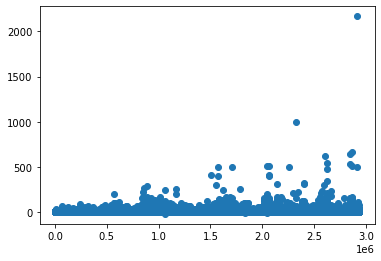

In [12]:
plt.scatter(range(train.shape[0]), train['item_cnt_day'])

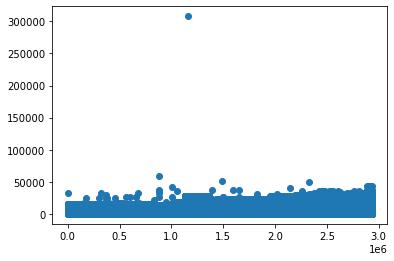

In [13]:
plt.scatter(range(train.shape[0]), train['item_price'])

In [14]:
train = train[train['item_price'] < 250000]
train = train[train['item_cnt_day'] < 1000]

The item has been returned 

In [15]:
train.loc[train.item_cnt_day < 0, 'item_cnt_day'] = 0

Convert date(object)  to datetime

In [16]:
train['date'] = pd.to_datetime(train['date'], format="%d.%m.%Y")
train['day']   = train['date'].dt.day
train['month'] = train['date'].dt.month
train['year']  = train['date'].dt.year
train.drop(['date'], axis=1,inplace=True)
train.drop(['day'], axis=1,inplace=True)
train.drop(['month'], axis=1,inplace=True)

In [17]:
year_month_sales = train.groupby(['year', 'date_block_num'])['item_cnt_day'].sum()
year_month_sales

year  date_block_num
2013  0                 131850.0
      1                 128382.0
      2                 147438.0
      3                 107439.0
      4                 107148.0
      5                 125583.0
      6                 117165.0
      7                 125586.0
      8                 133551.0
      9                 127815.0
      10                130270.0
      11                183669.0
2014  12                117243.0
      13                109975.0
      14                115501.0
      15                 96744.0
      16                 97938.0
      17                 97623.0
      18                 91505.0
      19                102910.0
      20                 99427.0
      21                107623.0
      22                118050.0
      23                169055.0
2015  24                110299.0
      25                 84419.0
      26                 82233.0
      27                 77948.0
      28                 72435.0
      29              

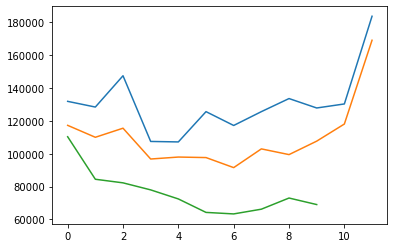

In [18]:
plt.plot(range(12), year_month_sales.values[0:12])
plt.plot(range(12), year_month_sales.values[12:24])
plt.plot(range(10), year_month_sales.values[24:34])

As we can see in all three years there is a seasonal trend

In [19]:
train.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year
0,0,59,22154,999.00,1.0,2013
1,0,25,2552,899.00,1.0,2013
2,0,25,2552,899.00,0.0,2013
3,0,25,2554,1709.05,1.0,2013
4,0,25,2555,1099.00,1.0,2013


No train look like this

# Test

Data Types
ID         int64
shop_id    int64
item_id    int64
dtype: object
Missing value
ID         0
shop_id    0
item_id    0
dtype: int64
Shape of Data
(214200, 3)
{dtype('int64')}


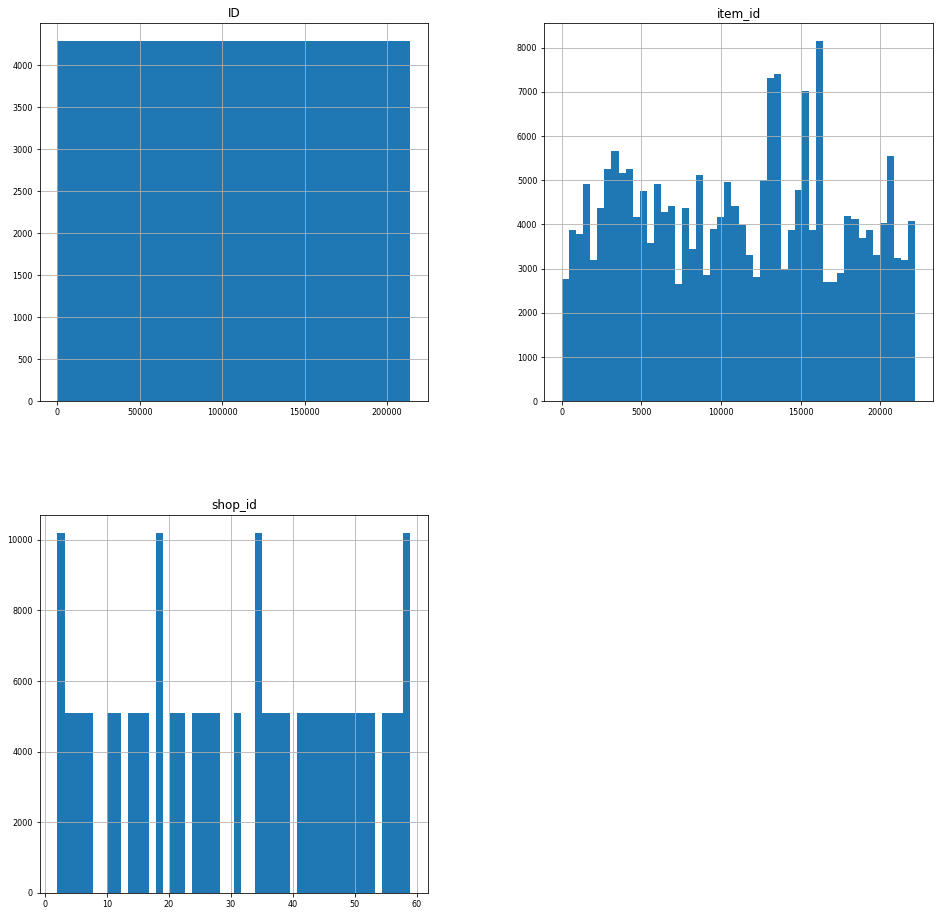

In [20]:
datatype(test)
graph_insight(test)

# Shops analysis

In [21]:
datatype(shops)

Data Types
shop_name    object
shop_id       int64
dtype: object
Missing value
shop_name    0
shop_id      0
dtype: int64
Shape of Data
(60, 2)


In [22]:
subset = ['shop_name', 'shop_id']
drop_duplicate(shops, subset = subset)

Before drop shape: (60, 2)
After drop shape: (60, 2)
Total Duplicate: 0


No duplicates, but it has similar shops

In [23]:
shops[shops["shop_id"].isin([10, 11])]

,shop_name,shop_id
10,Жуковский ул. Чкалова 39м?,10
11,Жуковский ул. Чкалова 39м²,11


In [24]:
shops[shops["shop_id"].isin([23, 24])]

,shop_name,shop_id
23,"Москва ТК ""Буденовский"" (пав.А2)",23
24,"Москва ТК ""Буденовский"" (пав.К7)",24


In [25]:
shops[shops["shop_id"].isin([0, 57])]

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
57,"Якутск Орджоникидзе, 56",57


In [26]:
shops[shops["shop_id"].isin([39,40])]

,shop_name,shop_id
39,"РостовНаДону ТРК ""Мегацентр Горизонт""",39
40,"РостовНаДону ТРК ""Мегацентр Горизонт"" Островной",40


In [27]:
shops[shops["shop_id"].isin([1, 58])]

,shop_name,shop_id
1,"!Якутск ТЦ ""Центральный"" фран",1
58,"Якутск ТЦ ""Центральный""",58


This is the same shops and we need to fix this

In [28]:
def fix_shops(shops):
    d = {0:57, 1:58, 10:11, 23:24,39:40}
    shops["shop_id"] = shops["shop_id"].apply(lambda x: d[x] if x in d.keys() else x)

In [29]:
fix_shops(shops)

In [30]:
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",57
1,"!Якутск ТЦ ""Центральный"" фран",58
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


# Items

In [31]:
datatype(item_category)

Data Types
item_category_name    object
item_category_id       int64
dtype: object
Missing value
item_category_name    0
item_category_id      0
dtype: int64
Shape of Data
(84, 2)


map the items

In [32]:
l = list(item_category.item_category_name)
l_cat = l

for ind in range(1,8):
    l_cat[ind] = 'Access'

for ind in range(10,18):
    l_cat[ind] = 'Consoles'

for ind in range(18,25):
    l_cat[ind] = 'Consoles Games'

for ind in range(26,28):
    l_cat[ind] = 'phone games'

for ind in range(28,32):
    l_cat[ind] = 'CD games'

for ind in range(32,37):
    l_cat[ind] = 'Card'

for ind in range(37,43):
    l_cat[ind] = 'Movie'

for ind in range(43,55):
    l_cat[ind] = 'Books'

for ind in range(55,61):
    l_cat[ind] = 'Music'

for ind in range(61,73):
    l_cat[ind] = 'Gifts'

for ind in range(73,79):
    l_cat[ind] = 'Soft'


item_category['cats'] = l_cat
item_category.head()

,item_category_name,item_category_id,cats
0,PC - Гарнитуры/Наушники,0,PC - Гарнитуры/Наушники
1,Аксессуары - PS2,1,Access
2,Аксессуары - PS3,2,Access
3,Аксессуары - PS4,3,Access
4,Аксессуары - PSP,4,Access


In [33]:
p_df = train.pivot_table(index=['shop_id','item_id'], columns='date_block_num', values='item_cnt_day',aggfunc='sum').fillna(0.0)
p_df.head()

date_block_num    0     1    2    3    4    5    6    7    8    9   ...   24  \
shop_id item_id                                                     ...        
0       30       0.0  31.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        31       0.0  11.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        32       6.0  10.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        33       3.0   3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        35       1.0  14.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

date_block_num    25   26   27   28   29   30   31   32   33  
shop_id item_id                                               
0       30       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        31       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        32       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        33       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        35       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 34 columns]

Preprocesing

In [34]:
train_cleaned_df = p_df.reset_index()
train_cleaned_df['shop_id']= train_cleaned_df.shop_id.astype('str')
train_cleaned_df['item_id']= train_cleaned_df.item_id.astype('str')

item_to_cat_df = items.merge(item_category[['item_category_id','cats']], how="inner", on="item_category_id")[['item_id','cats']]
item_to_cat_df[['item_id']] = item_to_cat_df.item_id.astype('str')

train_cleaned_df = train_cleaned_df.merge(item_to_cat_df, how="inner", on="item_id")

from sklearn import preprocessing

number = preprocessing.LabelEncoder()
train_cleaned_df[['cats']] = number.fit_transform(train_cleaned_df.cats)
train_cleaned_df = train_cleaned_df[['shop_id', 'item_id', 'cats'] + list(range(34))]
train_cleaned_df.head()

,shop_id,item_id,cats,0,1,2,3,4,5,6,...,24,25,26,27,28,29,30,31,32,33
0,0,30,7,0.0,31.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,30,7,0.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,30,7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,30,7,0.0,4.0,5.0,2.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,30,7,0.0,7.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Building a model

In [35]:
from xgboost import XGBRegressor

In [36]:
import xgboost as xgb
param = {'max_depth':10, 
         'subsample':1,
         'min_child_weight':0.5,
         'eta':0.3, 
         'num_round':1000, 
         'seed':1,
         'silent':0,
         'eval_metric':'rmse'}

xgbtrain = xgb.DMatrix(train_cleaned_df.iloc[:,  (train_cleaned_df.columns != 33)].values, train_cleaned_df.iloc[:, train_cleaned_df.columns == 33].values)
bst = xgb.train(param, xgbtrain)
preds = bst.predict(xgb.DMatrix(train_cleaned_df.iloc[:,  (train_cleaned_df.columns != 33)].values))
from sklearn.metrics import mean_squared_error 
rmse = np.sqrt(mean_squared_error(preds,train_cleaned_df.iloc[:, train_cleaned_df.columns == 33].values))
print(rmse)

[18:41:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { num_round, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


1.0112501943169778


rmse score 1.01

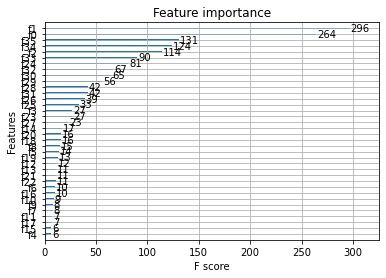

In [37]:
xgb.plot_importance(bst)

I merge the test data with the train data.

In [38]:
apply_df = test
apply_df['shop_id']= apply_df.shop_id.astype('str')
apply_df['item_id']= apply_df.item_id.astype('str')

apply_df = test.merge(train_cleaned_df, how = "left", on = ["shop_id", "item_id"]).fillna(0.0)
apply_df.head()

,ID,shop_id,item_id,cats,0,1,2,3,4,5,...,24,25,26,27,28,29,30,31,32,33
0,0,5,5037,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Move to one month front

In [39]:
d = dict(zip(apply_df.columns[4:],list(np.array(list(apply_df.columns[4:])) - 1)))

apply_df  = apply_df.rename(d, axis = 1)

In [40]:
apply_df.head()

,ID,shop_id,item_id,cats,-1,0,1,2,3,4,...,23,24,25,26,27,28,29,30,31,32
0,0,5,5037,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
preds = bst.predict(xgb.DMatrix(apply_df.iloc[:, (apply_df.columns != 'ID') & (apply_df.columns != -1)].values))

In [42]:
preds = list(map(lambda x: min(20,max(x,0)), list(preds)))
sub_df = pd.DataFrame({'ID':apply_df.ID,'item_cnt_month': preds })
sub_df

,ID,item_cnt_month
0,0,0.385721
1,1,0.124585
2,2,0.545253
3,3,0.157198
4,4,0.124585
...,...,...
214195,214195,0.212432
214196,214196,0.184755
214197,214197,0.060602
214198,214198,0.184755


In [43]:
sub_df.to_csv('Predict Sales.csv',index=False)